In [2]:
import os
import sys
import numpy as np
import torch
from diffusers import AutoPipelineForText2Image
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
sys.path.append('/raid/s2265822/diffusion-models-moe/sparsity')
from relufy_model import find_and_change_geglu 
from diffusers.pipelines.stable_diffusion import safety_checker

In [3]:
def sc(self, clip_input, images) :
    return images, [False for i in images]

# edit StableDiffusionSafetyChecker class so that, when called, it just returns the images and an array of True values
safety_checker.StableDiffusionSafetyChecker.forward = sc

In [4]:
fine_tuned_unet = '../../diffusers/examples/text_to_image/relufied-stable-diffusion-v1-5/checkpoint-14000/'
gpu = 7

In [5]:
unet = UNet2DConditionModel.from_pretrained(fine_tuned_unet + "unet", torch_dtype=torch.float16)

/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)


In [6]:
unet = find_and_change_geglu(unet)
model = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5', torch_dtype=torch.float16)
model = model.to(gpu)

Relu test passed
Number of changed modules: 16


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
ann = 'a photo of a man'
torch.manual_seed(0)
np.random.seed(0)
image = model(ann).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [11]:
model
# model.text_encoder

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

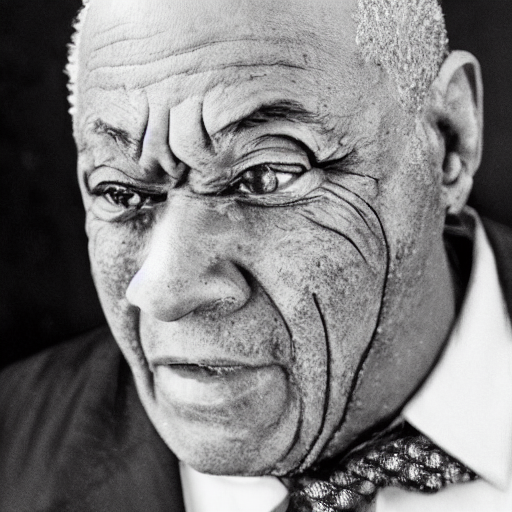

In [7]:
image

In [8]:
ann = 'a photo of a cat carcass'
torch.manual_seed(1)
np.random.seed(1)
image = model(ann).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

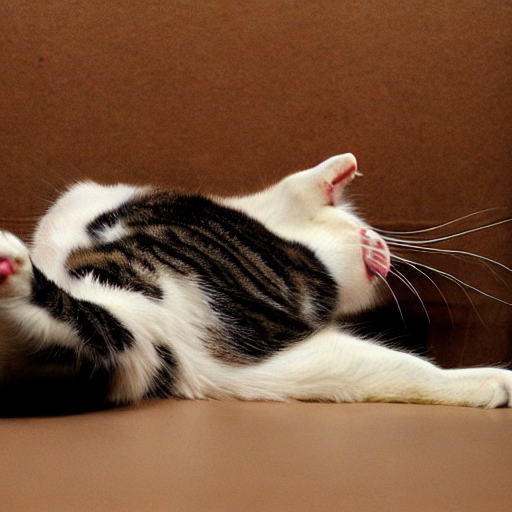

In [9]:
image

In [16]:
from diffusers import DiTPipeline, DPMSolverMultistepScheduler

model = DiTPipeline.from_pretrained('facebook/DiT-XL-2-256', torch_dtype=torch.float16)
model.scheduler = DPMSolverMultistepScheduler.from_config(model.scheduler.config)
model = model.to(gpu)
ann = ['white ambulance']

model.labels
class_ids = model.get_label_ids(ann)
# torch.manual_seed(0)
# np.random.seed(0)
image = model(class_labels=class_ids).images[0]


vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)


ValueError: white ambulance does not exist. Please make sure to select one of the following labels: 
 {'ATM': 480, 'Acinonyx jubatus': 293, 'Aepyceros melampus': 352, 'Afghan': 160, 'Afghan hound': 160, 'African chameleon': 47, 'African crocodile': 49, 'African elephant': 386, 'African gray': 87, 'African grey': 87, 'African hunting dog': 275, 'Ailuropoda melanoleuca': 388, 'Ailurus fulgens': 387, 'Airedale': 191, 'Airedale terrier': 191, 'Alaska crab': 121, 'Alaska king crab': 121, 'Alaskan king crab': 121, 'Alaskan malamute': 249, 'Alligator mississipiensis': 50, 'Alopex lagopus': 279, 'Ambystoma maculatum': 28, 'Ambystoma mexicanum': 29, 'American Staffordshire terrier': 180, 'American alligator': 50, 'American black bear': 295, 'American chameleon': 40, 'American coot': 137, 'American eagle': 22, 'American egret': 132, 'American lobster': 122, 'American pit bull terrier': 180, 'American robin': 15, 'Angora': 332, 'Angora rabbit': 332, 'Anolis carolinensis': 40, 'Appenzeller': 240, 'Aptenodytes patagonica': 145, 'Arabian camel': 354, 'Aramus pictus': 135, 'Aranea diademata': 74, 'Araneus cavaticus': 73, 'Arctic fox': 279, 'Arctic wolf': 270, 'Arenaria interpres': 139, 'Argiope aurantia': 72, 'Ascaphus trui': 32, 'Asiatic buffalo': 346, 'Ateles geoffroyi': 381, 'Australian terrier': 193, 'Band Aid': 419, 'Bedlington terrier': 181, 'Bernese mountain dog': 239, 'Biro': 418, 'Blenheim spaniel': 156, 'Bonasa umbellus': 82, 'Border collie': 232, 'Border terrier': 182, 'Boston bull': 195, 'Boston terrier': 195, 'Bouvier des Flandres': 233, 'Bouviers des Flandres': 233, 'Brabancon griffon': 262, 'Bradypus tridactylus': 364, 'Brittany spaniel': 215, 'Bubalus bubalis': 346, 'CD player': 485, 'CRO': 688, 'CRT screen': 782, 'Cacatua galerita': 89, 'Camelus dromedarius': 354, 'Cancer irroratus': 119, 'Cancer magister': 118, 'Canis dingo': 273, 'Canis latrans': 272, 'Canis lupus': 269, 'Canis lupus tundrarum': 270, 'Canis niger': 271, 'Canis rufus': 271, 'Cape hunting dog': 275, 'Capra ibex': 350, 'Carassius auratus': 1, 'Carcharodon carcharias': 2, 'Cardigan': 264, 'Cardigan Welsh corgi': 264, 'Carduelis carduelis': 11, 'Caretta caretta': 33, 'Carphophis amoenus': 52, 'Carpodacus mexicanus': 12, 'Cavia cobaya': 338, 'Cebus capucinus': 378, 'Cerastes cornutus': 66, 'Chamaeleo chamaeleon': 47, 'Chesapeake Bay retriever': 209, 'Chihuahua': 151, 'Chlamydosaurus kingi': 43, 'Christmas stocking': 496, 'Ciconia ciconia': 127, 'Ciconia nigra': 128, 'Constrictor constrictor': 61, 'Crock Pot': 521, 'Crocodylus niloticus': 49, 'Crotalus adamanteus': 67, 'Crotalus cerastes': 68, 'Cuon alpinus': 274, 'Cygnus atratus': 100, 'Cypripedium calceolus': 986, 'Cypripedium parviflorum': 986, 'Danaus plexippus': 323, 'Dandie Dinmont': 194, 'Dandie Dinmont terrier': 194, 'Dermochelys coriacea': 34, 'Doberman': 236, 'Doberman pinscher': 236, 'Dugong dugon': 149, 'Dungeness crab': 118, 'Dutch oven': 544, 'Egretta albus': 132, 'Egretta caerulea': 131, 'Egyptian cat': 285, 'Elephas maximus': 385, 'English cocker spaniel': 219, 'English foxhound': 167, 'English setter': 212, 'English springer': 217, 'English springer spaniel': 217, 'EntleBucher': 241, 'Erolia alpina': 140, 'Erythrocebus patas': 371, 'Eschrichtius gibbosus': 147, 'Eschrichtius robustus': 147, 'Eskimo dog': 248, 'Euarctos americanus': 295, 'European fire salamander': 25, 'European gallinule': 136, 'Felis concolor': 286, 'Felis onca': 290, 'French bulldog': 245, 'French horn': 566, 'French loaf': 930, 'Fringilla montifringilla': 10, 'Fulica americana': 137, 'Galeocerdo cuvieri': 3, 'German police dog': 235, 'German shepherd': 235, 'German shepherd dog': 235, 'German short-haired pointer': 210, 'Gila monster': 45, 'Gordon setter': 214, 'Gorilla gorilla': 366, 'Granny Smith': 948, 'Great Dane': 246, 'Great Pyrenees': 257, 'Greater Swiss Mountain dog': 238, 'Grifola frondosa': 996, 'Haliaeetus leucocephalus': 22, 'Heloderma suspectum': 45, 'Hippopotamus amphibius': 344, 'Holocanthus tricolor': 392, 'Homarus americanus': 122, 'Hungarian pointer': 211, 'Hylobates lar': 368, 'Hylobates syndactylus': 369, 'Hypsiglena torquata': 60, 'Ibizan Podenco': 173, 'Ibizan hound': 173, 'Iguana iguana': 39, 'Indian cobra': 63, 'Indian elephant': 385, 'Indri brevicaudatus': 384, 'Indri indri': 384, 'Irish setter': 213, 'Irish terrier': 184, 'Irish water spaniel': 221, 'Irish wolfhound': 170, 'Italian greyhound': 171, 'Japanese spaniel': 152, 'Kakatoe galerita': 89, 'Kerry blue terrier': 183, 'Komodo dragon': 48, 'Komodo lizard': 48, 'Labrador retriever': 208, 'Lacerta viridis': 46, 'Lakeland terrier': 189, 'Latrodectus mactans': 75, 'Lemur catta': 383, 'Leonberg': 255, 'Lepisosteus osseus': 395, 'Lhasa': 204, 'Lhasa apso': 204, 'Loafer': 630, 'Loxodonta africana': 386, 'Lycaon pictus': 275, 'Madagascar cat': 383, 'Maine lobster': 122, 'Maltese': 153, 'Maltese dog': 153, 'Maltese terrier': 153, 'Melursus ursinus': 297, 'Mergus serrator': 98, 'Mexican hairless': 268, 'Model T': 661, 'Mustela nigripes': 359, 'Mustela putorius': 358, 'Naja naja': 63, 'Nasalis larvatus': 376, 'Newfoundland': 256, 'Newfoundland dog': 256, 'Nile crocodile': 49, 'Norfolk terrier': 185, 'Northern lobster': 122, 'Norwegian elkhound': 174, 'Norwich terrier': 186, 'Old English sheepdog': 229, 'Oncorhynchus kisutch': 391, 'Orcinus orca': 148, 'Ornithorhynchus anatinus': 103, 'Ovis canadensis': 349, 'Pan troglodytes': 367, 'Panthera leo': 291, 'Panthera onca': 290, 'Panthera pardus': 288, 'Panthera tigris': 292, 'Panthera uncia': 289, 'Paralithodes camtschatica': 121, 'Passerina cyanea': 14, 'Peke': 154, 'Pekinese': 154, 'Pekingese': 154, 'Pembroke': 263, 'Pembroke Welsh corgi': 263, 'Persian cat': 283, 'Petri dish': 712, 'Phalangium opilio': 70, 'Phascolarctos cinereus': 105, 'Polaroid Land camera': 732, 'Polaroid camera': 732, 'Polyporus frondosus': 996, 'Pomeranian': 259, 'Pongo pygmaeus': 365, 'Porphyrio porphyrio': 136, 'Psittacus erithacus': 87, 'Python sebae': 62, 'R.V.': 757, 'RV': 757, 'Rana catesbeiana': 30, 'Rhodesian ridgeback': 159, 'Rocky Mountain bighorn': 349, 'Rocky Mountain sheep': 349, 'Rottweiler': 234, 'Russian wolfhound': 169, 'Saimiri sciureus': 382, 'Saint Bernard': 247, 'Salamandra salamandra': 25, 'Saluki': 176, 'Samoyed': 258, 'Samoyede': 258, 'Sciurus niger': 335, 'Scotch terrier': 199, 'Scottie': 199, 'Scottish deerhound': 177, 'Scottish terrier': 199, 'Sealyham': 190, 'Sealyham terrier': 190, 'Shetland': 230, 'Shetland sheep dog': 230, 'Shetland sheepdog': 230, 'Shih-Tzu': 155, 'Siamese': 284, 'Siamese cat': 284, 'Siberian husky': 250, 'St Bernard': 247, 'Staffordshire bull terrier': 179, 'Staffordshire bullterrier': 179, 'Staffordshire terrier': 180, 'Strix nebulosa': 24, 'Struthio camelus': 9, 'Sus scrofa': 342, 'Sussex spaniel': 220, 'Sydney silky': 201, 'Symphalangus syndactylus': 369, 'T-shirt': 610, 'Thalarctos maritimus': 296, 'Tibetan mastiff': 244, 'Tibetan terrier': 200, 'Tinca tinca': 0, 'Tringa totanus': 141, 'Triturus vulgaris': 26, 'Turdus migratorius': 15, 'U-boat': 833, 'Urocyon cinereoargenteus': 280, 'Ursus Maritimus': 296, 'Ursus americanus': 295, 'Ursus arctos': 294, 'Ursus ursinus': 297, 'Varanus komodoensis': 48, 'Virginia fence': 912, 'Vulpes macrotis': 278, 'Vulpes vulpes': 277, 'Walker foxhound': 166, 'Walker hound': 166, 'Weimaraner': 178, 'Welsh springer spaniel': 218, 'West Highland white terrier': 203, 'Windsor tie': 906, 'Yorkshire terrier': 187, 'abacus': 398, 'abaya': 399, 'academic gown': 400, 'academic robe': 400, 'accordion': 401, 'acorn': 988, 'acorn squash': 941, 'acoustic guitar': 402, 'admiral': 321, 'aegis': 461, 'affenpinscher': 252, 'agama': 42, 'agaric': 992, 'ai': 364, 'aircraft carrier': 403, 'airliner': 404, 'airship': 405, 'albatross': 146, 'all-terrain bike': 671, 'alligator lizard': 44, 'alp': 970, 'alsatian': 235, 'altar': 406, 'ambulance': 407, 'amphibian': 408, 'amphibious vehicle': 408, 'analog clock': 409, 'ananas': 953, 'anemone': 108, 'anemone fish': 393, 'anole': 40, 'ant': 310, 'anteater': 102, 'apiary': 410, 'apron': 411, 'armadillo': 363, 'armored combat vehicle': 847, 'armoured combat vehicle': 847, 'army tank': 847, 'artichoke': 944, 'articulated lorry': 867, 'ash bin': 412, 'ash-bin': 412, 'ashbin': 412, 'ashcan': 412, 'assault gun': 413, 'assault rifle': 413, 'attack aircraft carrier': 403, 'automated teller': 480, 'automated teller machine': 480, 'automatic teller': 480, 'automatic teller machine': 480, 'automatic washer': 897, 'axolotl': 29, 'baboon': 372, 'back pack': 414, 'backpack': 414, 'badger': 362, 'bagel': 931, 'bakehouse': 415, 'bakery': 415, 'bakeshop': 415, 'balance beam': 416, 'bald eagle': 22, 'balloon': 417, 'ballpen': 418, 'ballplayer': 981, 'ballpoint': 418, 'ballpoint pen': 418, 'balusters': 421, 'balustrade': 421, 'banana': 954, 'bandeau': 459, 'banded gecko': 38, 'banister': 421, 'banjo': 420, 'bannister': 421, 'barbell': 422, 'barber chair': 423, 'barbershop': 424, 'barn': 425, 'barn spider': 73, 'barometer': 426, 'barracouta': 389, 'barrel': 427, 'barrow': 428, 'bars': 702, 'baseball': 429, 'baseball player': 981, 'basenji': 253, 'basketball': 430, 'basset': 161, 'basset hound': 161, 'bassinet': 431, 'bassoon': 432, 'bath': 435, 'bath towel': 434, 'bathing cap': 433, 'bathing trunks': 842, 'bathing tub': 435, 'bathroom tissue': 999, 'bathtub': 435, 'beach waggon': 436, 'beach wagon': 436, 'beacon': 437, 'beacon light': 437, 'beagle': 162, 'beaker': 438, 'beam': 416, 'bear cat': 387, 'bearskin': 439, 'beaver': 337, 'bee': 309, 'bee eater': 92, 'bee house': 410, 'beer bottle': 440, 'beer glass': 441, 'beigel': 931, 'bell': 494, 'bell cot': 442, 'bell cote': 442, 'bell pepper': 945, 'bell toad': 32, 'bib': 443, 'bicycle-built-for-two': 444, 'bighorn': 349, 'bighorn sheep': 349, 'bikini': 445, 'billfish': 395, 'billfold': 893, 'billiard table': 736, 'binder': 446, 'binoculars': 447, 'birdhouse': 448, 'bison': 347, 'bittern': 133, 'black Maria': 734, 'black and gold garden spider': 72, 'black bear': 295, 'black grouse': 80, 'black stork': 128, 'black swan': 100, 'black widow': 75, 'black-and-tan coonhound': 165, 'black-footed ferret': 359, 'bloodhound': 163, 'blow drier': 589, 'blow dryer': 589, 'blower': 545, 'blowfish': 397, 'blue jack': 391, 'blue jean': 608, 'bluetick': 164, 'boa': 552, 'boa constrictor': 61, 'boar': 342, 'board': 532, 'boat paddle': 693, 'boathouse': 449, 'bob': 450, 'bobsled': 450, 'bobsleigh': 450, 'bobtail': 229, 'bola': 451, 'bola tie': 451, 'bolete': 997, 'bolo': 451, 'bolo tie': 451, 'bonnet': 452, 'book jacket': 921, 'bookcase': 453, 'bookshop': 454, 'bookstall': 454, 'bookstore': 454, 'borzoi': 169, 'bottle screw': 512, 'bottlecap': 455, 'bow': 456, 'bow tie': 457, 'bow-tie': 457, 'bowtie': 457, 'box tortoise': 37, 'box turtle': 37, 'boxer': 242, 'bra': 459, 'brain coral': 109, 'brambling': 10, 'brass': 458, 'brassiere': 459, 'breakwater': 460, 'breastplate': 461, 'briard': 226, 'bridegroom': 982, 'broccoli': 937, 'broom': 462, 'brown bear': 294, 'bruin': 294, 'brush kangaroo': 104, 'brush wolf': 272, 'bubble': 971, 'bucket': 463, 'buckeye': 990, 'buckle': 464, 'buckler': 787, 'bulbul': 16, 'bull mastiff': 243, 'bullet': 466, 'bullet train': 466, 'bulletproof vest': 465, 'bullfrog': 30, 'bulwark': 460, 'burrito': 965, 'busby': 439, 'bustard': 138, 'butcher shop': 467, 'butternut squash': 942, 'cab': 468, 'cabbage butterfly': 324, 'cairn': 192, 'cairn terrier': 192, 'caldron': 469, 'can opener': 473, 'candle': 470, 'candy store': 509, 'cannon': 471, 'canoe': 472, 'capitulum': 998, 'capuchin': 378, 'car mirror': 475, 'car wheel': 479, 'carabid beetle': 302, 'carbonara': 959, 'cardigan': 474, 'cardoon': 946, 'carousel': 476, "carpenter's kit": 477, "carpenter's plane": 726, 'carriage': 705, 'carriage dog': 251, 'carrier': 403, 'carrion fungus': 994, 'carrousel': 476, 'carton': 478, 'cash dispenser': 480, 'cash machine': 480, 'cask': 427, 'cassette': 481, 'cassette player': 482, 'castle': 483, 'cat bear': 387, 'catamaran': 484, 'catamount': 287, 'cathode-ray oscilloscope': 688, 'cauldron': 469, 'cauliflower': 938, 'cell': 487, 'cello': 486, 'cellphone': 487, 'cellular phone': 487, 'cellular telephone': 487, 'centipede': 79, 'cerastes': 66, 'chain': 488, 'chain armor': 490, 'chain armour': 490, 'chain mail': 490, 'chain saw': 491, 'chainlink fence': 489, 'chainsaw': 491, 'chambered nautilus': 117, 'cheeseburger': 933, 'cheetah': 293, 'chest': 492, 'chetah': 293, 'chickadee': 19, 'chiffonier': 493, 'chime': 494, 'chimp': 367, 'chimpanzee': 367, 'china cabinet': 495, 'china closet': 495, 'chiton': 116, 'chocolate sauce': 960, 'chocolate syrup': 960, 'chopper': 499, 'chow': 260, 'chow chow': 260, 'chrysanthemum dog': 200, 'chrysomelid': 304, 'church': 497, 'church building': 497, 'chute': 701, 'cicada': 316, 'cicala': 316, 'cimarron': 349, 'cinema': 498, 'claw': 600, 'cleaver': 499, 'cliff': 972, 'cliff dwelling': 500, 'cloak': 501, 'clog': 502, 'closet': 894, 'clumber': 216, 'clumber spaniel': 216, 'coach': 705, 'coach dog': 251, 'coast': 978, 'coat-of-mail shell': 116, 'cock': 7, 'cocker': 219, 'cocker spaniel': 219, 'cockroach': 314, 'cocktail shaker': 503, 'coffee mug': 504, 'coffeepot': 505, 'coho': 391, 'coho salmon': 391, 'cohoe': 391, 'coil': 506, 'collie': 231, 'colobus': 375, 'colobus monkey': 375, 'combination lock': 507, 'comfort': 750, 'comforter': 750, 'comic book': 917, 'commode': 493, 'common iguana': 39, 'common newt': 26, 'computer keyboard': 508, 'computer mouse': 673, 'conch': 112, 'confectionary': 509, 'confectionery': 509, 'conker': 990, 'consomme': 925, 'container ship': 510, 'container vessel': 510, 'containership': 510, 'convertible': 511, 'coon bear': 388, 'coral fungus': 991, 'coral reef': 973, 'corkscrew': 512, 'corn': 987, 'cornet': 513, 'cot': 520, 'cottontail': 330, 'cottontail rabbit': 330, 'coucal': 91, 'cougar': 286, 'courgette': 939, 'cowboy boot': 514, 'cowboy hat': 515, 'coyote': 272, 'cradle': 516, 'crampfish': 5, 'crane': 517, 'crash helmet': 518, 'crate': 519, 'crawdad': 124, 'crawdaddy': 124, 'crawfish': 124, 'crayfish': 124, 'crib': 520, 'cricket': 312, 'crinoline': 601, 'croquet ball': 522, 'crossword': 918, 'crossword puzzle': 918, 'crutch': 523, 'cucumber': 943, 'cuirass': 524, 'cuke': 943, 'cup': 968, 'curly-coated retriever': 206, 'custard apple': 956, 'daddy longlegs': 70, 'daisy': 985, 'dalmatian': 251, 'dam': 525, 'damselfly': 320, 'dark glasses': 837, 'darning needle': 319, 'day bed': 831, 'deerhound': 177, 'denim': 608, 'desk': 526, 'desktop computer': 527, "devil's darning needle": 319, 'devilfish': 147, 'dhole': 274, 'dial phone': 528, 'dial telephone': 528, 'diamondback': 67, 'diamondback rattlesnake': 67, 'diaper': 529, 'digital clock': 530, 'digital watch': 531, 'dike': 525, 'dingo': 273, 'dining table': 532, 'dipper': 20, 'dirigible': 405, 'disc brake': 535, 'dish washer': 534, 'dishcloth': 533, 'dishrag': 533, 'dishwasher': 534, 'dishwashing machine': 534, 'disk brake': 535, 'dock': 536, 'dockage': 536, 'docking facility': 536, 'dog sled': 537, 'dog sleigh': 537, 'dogsled': 537, 'dome': 538, 'doormat': 539, 'dough': 961, 'dowitcher': 142, 'dragon lizard': 48, 'dragonfly': 319, 'drake': 97, 'drilling platform': 540, 'dromedary': 354, 'drop': 972, 'drop-off': 972, 'drum': 541, 'drumstick': 542, 'duck-billed platypus': 103, 'duckbill': 103, 'duckbilled platypus': 103, 'dugong': 149, 'dumbbell': 543, 'dung beetle': 305, 'dunlin': 140, 'dust cover': 921, 'dust jacket': 921, 'dust wrapper': 921, 'dustbin': 412, 'dustcart': 569, 'dyke': 525, 'ear': 998, 'earthstar': 995, 'eastern fox squirrel': 335, 'eatery': 762, 'eating house': 762, 'eating place': 762, 'echidna': 102, 'eel': 390, 'eft': 27, 'eggnog': 969, 'egis': 461, 'electric fan': 545, 'electric guitar': 546, 'electric locomotive': 547, 'electric ray': 5, 'electric switch': 844, 'electrical switch': 844, 'elkhound': 174, 'emmet': 310, 'entertainment center': 548, 'envelope': 549, 'espresso': 967, 'espresso maker': 550, 'essence': 711, 'estate car': 436, 'ewer': 725, 'face powder': 551, 'feather boa': 552, 'ferret': 359, 'fiddle': 889, 'fiddler crab': 120, 'field glasses': 447, 'fig': 952, 'file': 553, 'file cabinet': 553, 'filing cabinet': 553, 'fire engine': 555, 'fire screen': 556, 'fire truck': 555, 'fireboat': 554, 'fireguard': 556, 'fitch': 358, 'fixed disk': 592, 'flagpole': 557, 'flagstaff': 557, 'flamingo': 130, 'flat-coated retriever': 205, 'flattop': 403, 'flatworm': 110, 'flowerpot': 738, 'flute': 558, 'fly': 308, 'folding chair': 559, 'food market': 582, 'football helmet': 560, 'footstall': 708, 'foreland': 976, 'forklift': 561, 'foulmart': 358, 'foumart': 358, 'fountain': 562, 'fountain pen': 563, 'four-poster': 564, 'fox squirrel': 335, 'freight car': 565, 'frilled lizard': 43, 'frying pan': 567, 'frypan': 567, 'fur coat': 568, 'gar': 395, 'garbage can': 412, 'garbage truck': 569, 'garden cart': 428, 'garden spider': 74, 'garfish': 395, 'garpike': 395, 'garter snake': 57, 'gas helmet': 570, 'gas pump': 571, 'gasmask': 570, 'gasoline pump': 571, 'gazelle': 353, 'gazelle hound': 176, 'geta': 502, 'geyser': 974, 'giant lizard': 48, 'giant panda': 388, 'giant schnauzer': 197, 'gibbon': 368, 'glasshouse': 580, 'globe artichoke': 944, 'globefish': 397, 'go-kart': 573, 'goblet': 572, 'golden retriever': 207, 'goldfinch': 11, 'goldfish': 1, 'golf ball': 574, 'golf cart': 575, 'golfcart': 575, 'gondola': 576, 'gong': 577, 'goose': 99, 'gorilla': 366, 'gown': 578, 'grampus': 148, 'grand': 579, 'grand piano': 579, 'grass snake': 57, 'grasshopper': 311, 'gray fox': 280, 'gray whale': 147, 'gray wolf': 269, 'great gray owl': 24, 'great grey owl': 24, 'great white heron': 132, 'great white shark': 2, 'green lizard': 46, 'green mamba': 64, 'green snake': 55, 'greenhouse': 580, 'grey fox': 280, 'grey whale': 147, 'grey wolf': 269, 'grille': 581, 'grocery': 582, 'grocery store': 582, 'groenendael': 224, 'groin': 460, 'groom': 982, 'ground beetle': 302, 'groyne': 460, 'grunter': 341, 'guacamole': 924, 'guenon': 370, 'guenon monkey': 370, 'guillotine': 583, 'guinea pig': 338, 'gyromitra': 993, 'hack': 468, 'hair drier': 589, 'hair dryer': 589, 'hair slide': 584, 'hair spray': 585, 'half track': 586, 'hammer': 587, 'hammerhead': 4, 'hammerhead shark': 4, 'hamper': 588, 'hamster': 333, 'hand blower': 589, 'hand-held computer': 590, 'hand-held microcomputer': 590, 'handbasin': 896, 'handkerchief': 591, 'handrail': 421, 'hankey': 591, 'hankie': 591, 'hanky': 591, 'hard disc': 592, 'hard disk': 592, 'hare': 331, 'harmonica': 593, 'harp': 594, 'hartebeest': 351, 'harvester': 595, 'harvestman': 70, 'hatchet': 596, 'hautbois': 683, 'hautboy': 683, 'haversack': 414, 'hay': 958, 'head': 976, 'head cabbage': 936, 'headland': 976, 'hedgehog': 334, 'helix': 506, 'hen': 8, 'hen of the woods': 996, 'hen-of-the-woods': 996, 'hermit crab': 125, 'high bar': 602, 'hip': 989, 'hippo': 344, 'hippopotamus': 344, 'hockey puck': 746, 'hodometer': 685, 'hog': 341, 'hognose snake': 54, 'holothurian': 329, 'holster': 597, 'home theater': 598, 'home theatre': 598, 'honeycomb': 599, 'hook': 600, 'hoopskirt': 601, 'hopper': 311, 'horizontal bar': 602, 'horn': 566, 'hornbill': 93, 'horned asp': 66, 'horned rattlesnake': 68, 'horned viper': 66, 'horse cart': 603, 'horse chestnut': 990, 'horse-cart': 603, 'hot dog': 934, 'hot pot': 926, 'hotdog': 934, 'hotpot': 926, 'hourglass': 604, 'house finch': 12, 'howler': 379, 'howler monkey': 379, 'hummingbird': 94, 'hunting spider': 77, 'husky': 248, 'hussar monkey': 371, 'hyaena': 276, 'hyena': 276, 'hyena dog': 275, 'iPod': 605, 'ibex': 350, 'ice bear': 296, 'ice cream': 928, 'ice lolly': 929, 'icebox': 760, 'icecream': 928, 'igniter': 626, 'ignitor': 626, 'iguana': 39, 'impala': 352, 'indigo bird': 14, 'indigo bunting': 14, 'indigo finch': 14, 'indri': 384, 'indris': 384, 'internet site': 916, 'iron': 606, 'island dispenser': 571, 'isopod': 126, 'jacamar': 95, 'jack': 955, "jack-o'-lantern": 607, 'jackfruit': 955, 'jaguar': 290, 'jak': 955, 'jammies': 697, 'jay': 17, 'jean': 608, 'jeep': 609, 'jellyfish': 107, 'jersey': 610, 'jetty': 460, "jeweler's loupe": 633, 'jigsaw puzzle': 611, 'jinrikisha': 612, 'joystick': 613, "judge's robe": 400, 'junco': 13, 'kangaroo bear': 105, 'keeshond': 261, 'kelpie': 227, 'keypad': 508, 'killer': 148, 'killer whale': 148, 'kimono': 614, 'king crab': 121, 'king of beasts': 291, 'king penguin': 145, 'king snake': 56, 'kingsnake': 56, 'kit fox': 278, 'kite': 21, 'knapsack': 414, 'knee pad': 615, 'knot': 616, 'koala': 105, 'koala bear': 105, 'komondor': 228, 'kuvasz': 222, 'lab coat': 617, 'laboratory coat': 617, 'labyrinth': 646, 'lacewing': 318, 'lacewing fly': 318, 'ladle': 618, 'lady beetle': 301, 'ladybeetle': 301, 'ladybird': 301, 'ladybird beetle': 301, 'ladybug': 301, 'lakeshore': 975, 'lakeside': 975, 'lamp shade': 619, 'lampshade': 619, 'landrover': 609, 'langouste': 123, 'langur': 374, 'laptop': 620, 'laptop computer': 620, 'lavabo': 896, 'lawn cart': 428, 'lawn mower': 621, 'leaf beetle': 304, 'leafhopper': 317, 'leatherback': 34, 'leatherback turtle': 34, 'leathery turtle': 34, 'lemon': 951, 'lens cap': 622, 'lens cover': 622, 'leopard': 288, 'lesser panda': 387, 'letter box': 637, 'letter opener': 623, 'library': 624, 'lifeboat': 625, 'light': 626, 'lighter': 626, 'lighthouse': 437, 'limo': 627, 'limousine': 627, 'limpkin': 135, 'liner': 628, 'linnet': 12, 'lion': 291, 'lionfish': 396, 'lip rouge': 629, 'lipstick': 629, 'little blue heron': 131, 'llama': 355, 'loggerhead': 33, 'loggerhead turtle': 33, 'lollipop': 929, 'lolly': 929, 'long-horned beetle': 303, 'longicorn': 303, 'longicorn beetle': 303, 'lorikeet': 90, 'lotion': 631, 'loudspeaker': 632, 'loudspeaker system': 632, 'loupe': 633, 'lumbermill': 634, 'lycaenid': 326, 'lycaenid butterfly': 326, 'lynx': 287, 'macaque': 373, 'macaw': 88, 'magnetic compass': 635, 'magpie': 18, 'mail': 490, 'mailbag': 636, 'mailbox': 637, 'maillot': 639, 'malamute': 249, 'malemute': 249, 'malinois': 225, 'man-eater': 2, 'man-eating shark': 2, 'maned wolf': 271, 'manhole cover': 640, 'mantid': 315, 'mantis': 315, 'manufactured home': 660, 'maraca': 641, 'marimba': 642, 'market': 582, 'marmoset': 377, 'marmot': 336, 'marsh hen': 137, 'mashed potato': 935, 'mask': 643, 'matchstick': 644, 'maypole': 645, 'maze': 646, 'measuring cup': 647, 'meat cleaver': 499, 'meat loaf': 962, 'meat market': 467, 'meatloaf': 962, 'medicine cabinet': 648, 'medicine chest': 648, 'meerkat': 299, 'megalith': 649, 'megalithic structure': 649, 'membranophone': 541, 'memorial tablet': 458, 'menu': 922, 'merry-go-round': 476, 'microphone': 650, 'microwave': 651, 'microwave oven': 651, 'mierkat': 299, 'mike': 650, 'mileometer': 685, 'military plane': 895, 'military uniform': 652, 'milk can': 653, 'milkweed butterfly': 323, 'milometer': 685, 'mini': 655, 'miniature pinscher': 237, 'miniature poodle': 266, 'miniature schnauzer': 196, 'minibus': 654, 'miniskirt': 655, 'minivan': 656, 'mink': 357, 'missile': 744, 'mitten': 658, 'mixing bowl': 659, 'mobile home': 660, 'mobile phone': 487, 'modem': 662, 'mole': 460, 'mollymawk': 146, 'monarch': 323, 'monarch butterfly': 323, 'monastery': 663, 'mongoose': 298, 'monitor': 664, 'monkey dog': 252, 'monkey pinscher': 252, 'monocycle': 880, 'mop': 840, 'moped': 665, 'mortar': 666, 'mortarboard': 667, 'mosque': 668, 'mosquito hawk': 319, 'mosquito net': 669, 'motor scooter': 670, 'mountain bike': 671, 'mountain lion': 286, 'mountain tent': 672, 'mouse': 673, 'mousetrap': 674, 'mouth harp': 593, 'mouth organ': 593, 'movie house': 498, 'movie theater': 498, 'movie theatre': 498, 'moving van': 675, 'mower': 621, 'mud hen': 137, 'mud puppy': 29, 'mud turtle': 35, 'mushroom': 947, 'muzzle': 676, 'nail': 677, 'napkin': 529, 'nappy': 529, 'native bear': 105, 'nautilus': 117, 'neck brace': 678, 'necklace': 679, 'nematode': 111, 'nematode worm': 111, 'night snake': 60, 'nipple': 680, 'notebook': 681, 'notebook computer': 681, 'notecase': 893, 'nudibranch': 115, 'numbfish': 5, 'nursery': 580, 'obelisk': 682, 'oboe': 683, 'ocarina': 684, 'ocean liner': 628, 'odometer': 685, 'off-roader': 671, 'offshore rig': 540, 'oil filter': 686, 'one-armed bandit': 800, 'opera glasses': 447, 'orang': 365, 'orange': 950, 'orangutan': 365, 'orangutang': 365, 'orca': 148, 'organ': 687, 'oscilloscope': 688, 'ostrich': 9, 'otter': 360, 'otter hound': 175, 'otterhound': 175, 'ounce': 289, 'overskirt': 689, 'ox': 345, 'oxcart': 690, 'oxygen mask': 691, 'oyster catcher': 143, 'oystercatcher': 143, 'packet': 692, 'packsack': 414, 'paddle': 693, 'paddle wheel': 694, 'paddlewheel': 694, 'paddy wagon': 734, 'padlock': 695, 'pail': 463, 'paintbrush': 696, 'painter': 286, 'pajama': 697, 'palace': 698, 'paling': 716, 'panda': 388, 'panda bear': 388, 'pandean pipe': 699, 'panpipe': 699, 'panther': 290, 'paper knife': 623, 'paper towel': 700, 'paperknife': 623, 'papillon': 157, 'parachute': 701, 'parallel bars': 702, 'park bench': 703, 'parking meter': 704, 'partridge': 86, 'passenger car': 705, 'patas': 371, 'patio': 706, 'patrol wagon': 734, 'patten': 502, 'pay-phone': 707, 'pay-station': 707, 'peacock': 84, 'pearly nautilus': 117, 'pedestal': 708, 'pelican': 144, 'pencil box': 709, 'pencil case': 709, 'pencil eraser': 767, 'pencil sharpener': 710, 'penny bank': 719, 'perfume': 711, 'petrol pump': 571, 'pharos': 437, 'photocopier': 713, 'piano accordion': 401, 'pick': 714, 'pickelhaube': 715, 'picket fence': 716, 'pickup': 717, 'pickup truck': 717, 'picture palace': 498, 'pier': 718, 'pig': 341, 'pigboat': 833, 'piggy bank': 719, 'pill bottle': 720, 'pillow': 721, 'pineapple': 953, 'ping-pong ball': 722, 'pinwheel': 723, 'pipe organ': 687, 'pirate': 724, 'pirate ship': 724, 'pismire': 310, 'pit bull terrier': 180, 'pitcher': 725, 'pizza': 963, 'pizza pie': 963, "pj's": 697, 'plane': 726, 'planetarium': 727, 'plaque': 458, 'plastic bag': 728, 'plate': 923, 'plate rack': 729, 'platyhelminth': 110, 'platypus': 103, 'plectron': 714, 'plectrum': 714, 'plinth': 708, 'plough': 730, 'plow': 730, "plumber's helper": 731, 'plunger': 731, 'pocketbook': 893, 'poke bonnet': 452, 'polar bear': 296, 'pole': 733, 'polecat': 361, 'police van': 734, 'police wagon': 734, 'polyplacophore': 116, 'pomegranate': 957, 'poncho': 735, 'pool table': 736, 'pop bottle': 737, 'popsicle': 929, 'porcupine': 334, 'postbag': 636, 'pot': 738, 'potpie': 964, "potter's wheel": 739, 'power drill': 740, 'prairie chicken': 83, 'prairie fowl': 83, 'prairie grouse': 83, 'prairie wolf': 272, 'prayer mat': 741, 'prayer rug': 741, 'press': 894, 'pretzel': 932, 'printer': 742, 'prison': 743, 'prison house': 743, 'proboscis monkey': 376, 'projectile': 744, 'projector': 745, 'promontory': 976, 'ptarmigan': 81, 'puck': 746, 'puff': 750, 'puff adder': 54, 'puffer': 397, 'pufferfish': 397, 'pug': 254, 'pug-dog': 254, 'puma': 286, 'punch bag': 747, 'punchball': 747, 'punching bag': 747, 'punching ball': 747, 'purse': 748, 'pyjama': 697, 'quail': 85, 'quill': 749, 'quill pen': 749, 'quilt': 750, 'race car': 751, 'racer': 751, 'racing car': 751, 'racket': 752, 'racquet': 752, 'radiator': 753, 'radiator grille': 581, 'radio': 754, 'radio reflector': 755, 'radio telescope': 755, 'rain barrel': 756, 'ram': 348, 'rapeseed': 984, 'reaper': 595, 'recreational vehicle': 757, 'red fox': 277, 'red hot': 934, 'red panda': 387, 'red setter': 213, 'red wine': 966, 'red wolf': 271, 'red-backed sandpiper': 140, 'red-breasted merganser': 98, 'redbone': 168, 'redshank': 141, 'reel': 758, 'reflex camera': 759, 'refrigerator': 760, 'remote': 761, 'remote control': 761, 'respirator': 570, 'restaurant': 762, 'revolver': 763, 'rhinoceros beetle': 306, 'ribbed toad': 32, 'ricksha': 612, 'rickshaw': 612, 'rifle': 764, 'rig': 867, 'ring armor': 490, 'ring armour': 490, 'ring mail': 490, 'ring snake': 53, 'ring-binder': 446, 'ring-necked snake': 53, 'ring-tailed lemur': 383, 'ringlet': 322, 'ringlet butterfly': 322, 'ringneck snake': 53, 'ringtail': 378, 'river horse': 344, 'roach': 314, 'robin': 15, 'rock beauty': 392, 'rock crab': 119, 'rock lobster': 123, 'rock python': 62, 'rock snake': 62, 'rocker': 765, 'rocking chair': 765, 'rose hip': 989, 'rosehip': 989, 'rotisserie': 766, 'roundabout': 476, 'roundworm': 111, 'rubber': 767, 'rubber eraser': 767, 'rucksack': 414, 'ruddy turnstone': 139, 'ruffed grouse': 82, 'rugby ball': 768, 'rule': 769, 'ruler': 769, 'running shoe': 770, 'sabot': 502, 'safe': 771, 'safety pin': 772, 'salt shaker': 773, 'saltshaker': 773, 'sand bar': 977, 'sand viper': 66, 'sandal': 774, 'sandbar': 977, 'sarong': 775, 'sawmill': 634, 'sax': 776, 'saxophone': 776, 'scabbard': 777, 'scale': 778, 'schipperke': 223, 'school bus': 779, 'schooner': 780, 'scooter': 670, 'scope': 688, 'scoreboard': 781, 'scorpion': 71, 'screen': 782, 'screw': 783, 'screwdriver': 784, 'scuba diver': 983, 'sea anemone': 108, 'sea cradle': 116, 'sea crawfish': 123, 'sea cucumber': 329, 'sea lion': 150, 'sea slug': 115, 'sea snake': 65, 'sea star': 327, 'sea urchin': 328, 'sea wolf': 148, 'sea-coast': 978, 'seacoast': 978, 'seashore': 978, 'seat belt': 785, 'seatbelt': 785, 'seawall': 460, 'semi': 867, 'sewing machine': 786, 'sewing needle': 319, 'shades': 837, 'shako': 439, 'shield': 787, 'shoe shop': 788, 'shoe store': 788, 'shoe-shop': 788, 'shoji': 789, 'shopping basket': 790, 'shopping cart': 791, 'shovel': 792, 'shower cap': 793, 'shower curtain': 794, 'siamang': 369, 'sidewinder': 68, 'silky terrier': 201, 'silver salmon': 391, 'site': 916, 'six-gun': 763, 'six-shooter': 763, 'skeeter hawk': 319, 'ski': 795, 'ski mask': 796, 'skillet': 567, 'skunk': 361, 'sleeping bag': 797, 'sleuthhound': 163, 'slide rule': 798, 'sliding door': 799, 'slipstick': 798, 'slot': 800, 'sloth bear': 297, 'slug': 114, 'smoothing iron': 606, 'snail': 113, 'snake doctor': 319, 'snake feeder': 319, 'snake fence': 912, 'snake-rail fence': 912, 'snoek': 389, 'snooker table': 736, 'snorkel': 801, 'snow leopard': 289, 'snowbird': 13, 'snowmobile': 802, 'snowplough': 803, 'snowplow': 803, 'soap dispenser': 804, 'soccer ball': 805, 'sock': 806, 'soda bottle': 737, 'soft-coated wheaten terrier': 202, 'solar collector': 807, 'solar dish': 807, 'solar furnace': 807, 'sombrero': 808, 'sorrel': 339, 'soup bowl': 809, 'space bar': 810, 'space heater': 811, 'space shuttle': 812, 'spaghetti squash': 940, 'spatula': 813, 'speaker': 632, 'speaker system': 632, 'speaker unit': 632, 'speedboat': 814, 'spider monkey': 381, 'spider web': 815, "spider's web": 815, 'spike': 998, 'spindle': 816, 'spiny anteater': 102, 'spiny lobster': 123, 'spiral': 506, 'spoonbill': 129, 'sport car': 817, 'sports car': 817, 'spot': 818, 'spotlight': 818, 'spotted salamander': 28, 'squealer': 341, 'squeeze box': 401, 'squirrel monkey': 382, 'stage': 819, 'standard poodle': 267, 'standard schnauzer': 198, 'starfish': 327, 'station waggon': 436, 'station wagon': 436, 'steam locomotive': 820, 'steel arch bridge': 821, 'steel drum': 822, 'stethoscope': 823, 'stick insect': 313, 'stingray': 6, 'stinkhorn': 994, 'stole': 824, 'stone wall': 825, 'stop watch': 826, 'stoplight': 920, 'stopwatch': 826, 'stove': 827, 'strainer': 828, 'strawberry': 949, 'street sign': 919, 'streetcar': 829, 'stretcher': 830, 'studio couch': 831, 'stupa': 832, 'sturgeon': 394, 'sub': 833, 'submarine': 833, 'suit': 834, 'suit of clothes': 834, 'sulfur butterfly': 325, 'sulphur butterfly': 325, 'sulphur-crested cockatoo': 89, 'sun blocker': 838, 'sunblock': 838, 'sundial': 835, 'sunglass': 836, 'sunglasses': 837, 'sunscreen': 838, 'suspension bridge': 839, 'swab': 840, 'sweatshirt': 841, 'sweet potato': 684, 'swimming cap': 433, 'swimming trunks': 842, 'swing': 843, 'switch': 844, 'swob': 840, 'syringe': 845, 'syrinx': 699, 'tabby': 281, 'tabby cat': 281, 'table lamp': 846, 'tailed frog': 32, 'tailed toad': 32, 'tam-tam': 577, 'tandem': 444, 'tandem bicycle': 444, 'tank': 847, 'tank suit': 639, 'tape player': 848, 'taper': 470, 'tarantula': 76, 'taxi': 468, 'taxicab': 468, 'teapot': 849, 'teddy': 850, 'teddy bear': 850, 'tee shirt': 610, 'television': 851, 'television system': 851, 'ten-gallon hat': 515, 'tench': 0, 'tennis ball': 852, 'terrace': 706, 'terrapin': 36, 'thatch': 853, 'thatched roof': 853, 'theater curtain': 854, 'theatre curtain': 854, 'thimble': 855, 'thrasher': 856, 'three-toed sloth': 364, 'thresher': 856, 'threshing machine': 856, 'throne': 857, 'thunder snake': 52, 'tick': 78, 'tiger': 292, 'tiger beetle': 300, 'tiger cat': 282, 'tiger shark': 3, 'tile roof': 858, 'timber wolf': 269, 'tin opener': 473, 'titi': 380, 'titi monkey': 380, 'toaster': 859, 'tobacco shop': 860, 'tobacconist': 860, 'tobacconist shop': 860, 'toilet paper': 999, 'toilet seat': 861, 'toilet tissue': 999, 'tool kit': 477, 'tope': 832, 'torch': 862, 'torpedo': 5, 'totem pole': 863, 'toucan': 96, 'tow car': 864, 'tow truck': 864, 'toy poodle': 265, 'toy terrier': 158, 'toyshop': 865, 'trackless trolley': 874, 'tractor': 866, 'tractor trailer': 867, 'traffic light': 920, 'traffic signal': 920, 'trailer truck': 867, 'tram': 829, 'tramcar': 829, 'transverse flute': 558, 'trash barrel': 412, 'trash bin': 412, 'trash can': 412, 'tray': 868, 'tree frog': 31, 'tree-frog': 31, 'trench coat': 869, 'triceratops': 51, 'tricycle': 870, 'trifle': 927, 'trike': 870, 'trilobite': 69, 'trimaran': 871, 'tripod': 872, 'triumphal arch': 873, 'trolley': 829, 'trolley car': 829, 'trolley coach': 874, 'trolleybus': 874, 'trombone': 875, 'trucking rig': 867, 'trump': 513, 'trumpet': 513, 'tub': 876, 'tup': 348, 'turnstile': 877, 'tusker': 101, 'two-piece': 445, 'tympan': 541, 'typewriter keyboard': 878, 'umbrella': 879, 'unicycle': 880, 'upright': 881, 'upright piano': 881, 'vacuum': 882, 'vacuum cleaner': 882, 'vale': 979, 'valley': 979, 'vase': 883, 'vat': 876, 'vault': 884, 'velocipede': 870, 'velvet': 885, 'vending machine': 886, 'vestment': 887, 'viaduct': 888, 'vine snake': 59, 'violin': 889, 'violoncello': 486, 'vizsla': 211, 'volcano': 980, 'volleyball': 890, 'volute': 506, 'vulture': 23, 'waffle iron': 891, 'waggon': 436, 'wagon': 734, 'walking stick': 313, 'walkingstick': 313, 'wall clock': 892, 'wallaby': 104, 'wallet': 893, 'wardrobe': 894, 'warplane': 895, 'warragal': 273, 'warrigal': 273, 'warthog': 343, 'wash-hand basin': 896, 'washbasin': 896, 'washbowl': 896, 'washer': 897, 'washing machine': 897, 'wastebin': 412, 'water bottle': 898, 'water buffalo': 346, 'water hen': 137, 'water jug': 899, 'water ouzel': 20, 'water ox': 346, 'water snake': 58, 'water tower': 900, 'wax light': 470, 'weasel': 356, 'web site': 916, 'website': 916, 'weevil': 307, 'weighing machine': 778, 'welcome mat': 539, 'wheelbarrow': 428, 'whippet': 172, 'whiptail': 41, 'whiptail lizard': 41, 'whirligig': 476, 'whiskey jug': 901, 'whistle': 902, 'white fox': 279, 'white shark': 2, 'white stork': 127, 'white wolf': 270, 'whorl': 506, 'wig': 903, 'wild boar': 342, 'window screen': 904, 'window shade': 905, 'wine bottle': 907, 'wing': 908, 'wire-haired fox terrier': 188, 'wireless': 754, 'wok': 909, 'wolf spider': 77, 'wombat': 106, 'wood pussy': 361, 'wood rabbit': 330, 'wooden spoon': 910, 'woodworking plane': 726, 'wool': 911, 'woolen': 911, 'woollen': 911, 'worm fence': 912, 'worm snake': 52, 'wreck': 913, 'wrecker': 864, 'xylophone': 642, 'yawl': 914, "yellow lady's slipper": 986, 'yellow lady-slipper': 986, 'yurt': 915, 'zebra': 340, 'zucchini': 939}.

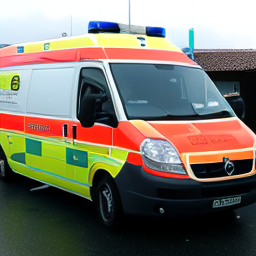

In [15]:
image

In [5]:
from diffusers import PixArtAlphaPipeline
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512", torch_dtype=torch.float16)
pipe = pipe.to('cuda:7')
pipe.enable_model_cpu_offload()


prompt = "A small cactus with a happy face in the Sahara desert."
image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
Some weights of the model checkpoint were not used when initializing Transformer2DModel: 
 ['caption_projection.y_embedding']


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/s2265822/Workspace/.conda/envs/moe/lib/python3.10/site-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


OutOfMemoryError: CUDA out of memory. Tried to allocate 80.00 MiB. GPU 0 has a total capacity of 31.74 GiB of which 41.38 MiB is free. Process 983169 has 20.96 GiB memory in use. Including non-PyTorch memory, this process has 10.73 GiB memory in use. Of the allocated memory 10.43 GiB is allocated by PyTorch, and 1.63 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

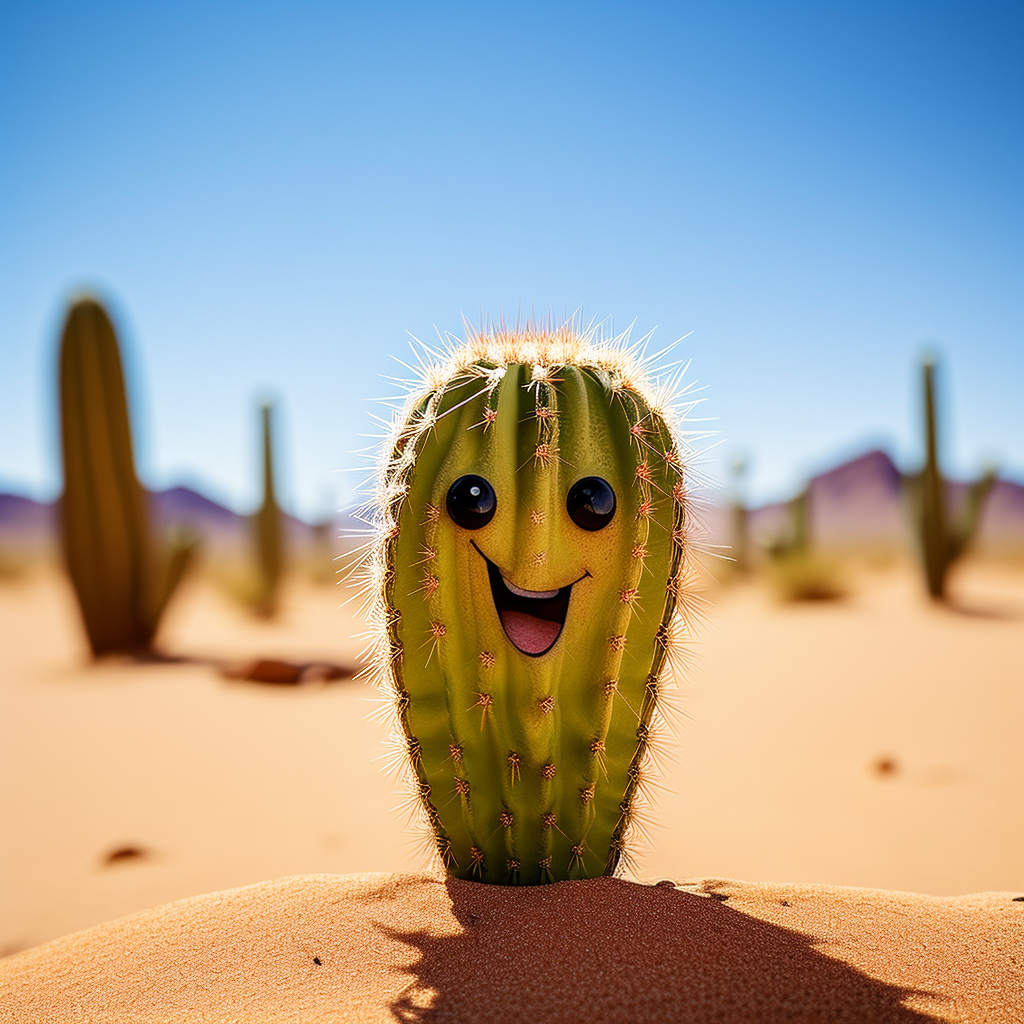

In [18]:
image

In [19]:
pipe

PixArtAlphaPipeline {
  "_class_name": "PixArtAlphaPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "PixArt-alpha/PixArt-XL-2-1024-MS",
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [20]:
pipe.transformer

Transformer2DModel(
  (pos_embed): PatchEmbed(
    (proj): Conv2d(4, 1152, kernel_size=(2, 2), stride=(2, 2))
  )
  (transformer_blocks): ModuleList(
    (0-27): 28 x BasicTransformerBlock(
      (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn1): Attention(
        (to_q): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
        (to_k): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
        (to_v): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
        (to_out): ModuleList(
          (0): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
          (1): Dropout(p=0.0, inplace=False)
        )
      )
      (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn2): Attention(
        (to_q): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
        (to_k): LoRACompatibleLinear(in_features=1152, out_features=1152, bias=True)
        (to_v)